In [1]:
#bring in our standard imports 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import time


In [2]:
full_panel = pd.read_csv('/Users/zachmariani/Desktop/Metrics/Final Project/Data/full_panel.csv')
full_panel = full_panel[full_panel['c_country_binary'] == 1]

In [20]:
print(full_panel.tail(2))

      year country_code            country_name  x_num_for_corps  \
1103  2016          TUR                  turkey            577.0   
1104  2016          VGB  british virgin islands            286.0   

      x_num_US_corps  x_total_assets  x_total_receipts      x_cur_EP  \
1103             368             NaN      3.190992e+10  1.339620e+09   
1104             212             NaN      9.435525e+09  7.472946e+08   

      x_p_num_for_corps  x_p_total_assets  ...    c_land  \
1103           0.006050               NaN  ...  769630.0   
1104           0.002999               NaN  ...     150.0   

      c_resource_endowment  c_population     c_rGDP y_deaths_under_14  \
1103                0.3026    79821724.0  25548.146       22639.93557   
1104                   NaN       29355.0  20565.969               NaN   

      y_gov_expend  y_HDI  y_life_expectancy  y_homicides  IV_interaction  
1103     32.720547  0.787             75.755          NaN    2.462273e+05  
1104           NaN    NaN

In [31]:
full_panel.columns

Index(['year', 'country_code', 'country_name', 'x_num_for_corps',
       'x_num_US_corps', 'x_total_assets', 'x_total_receipts', 'x_cur_EP',
       'x_p_num_for_corps', 'x_p_total_assets', 'x_p_total_receipts',
       'x_p_cur_EP', 'c_country_binary', 'c_region', 'c_sub_region', 'c_land',
       'c_resource_endowment', 'c_population', 'c_rGDP', 'y_deaths_under_14',
       'y_gov_expend', 'y_HDI', 'y_life_expectancy', 'y_homicides',
       'IV_interaction'],
      dtype='object')

Beta for x_p_total_assets nan
Beta for x_p_total_receipts nan
Beta for x_p_cur_EP nan
Beta for x_p_num_for_corps nan


/usr/local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python

Text(0.5, 0.98, 'IV Relevance')

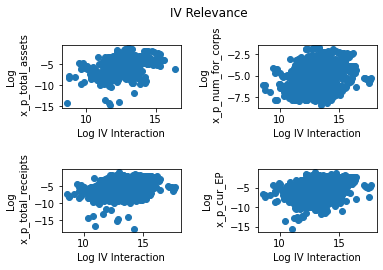

In [13]:
import matplotlib.pyplot as plt
x = 'IV_interaction'

fig, ax = plt.subplots(2,2)
fig.tight_layout(pad = 4)
cords = [(0,0), (1,0), (1,1),(0,1)]
counter = 0 
for y in ['x_p_total_assets', 'x_p_total_receipts', 'x_p_cur_EP', 'x_p_num_for_corps']:  
 
    a, b = cords[counter]
    ax[a,b].scatter(np.log(full_panel[x]), np.log(full_panel[y]))
    ax[a,b].set_ylabel('Log \n ' + y)
    ax[a,b].set_xlabel('Log IV Interaction')
    full_panel_sans_nan = full_panel.dropna(axis = 0, how = 'any')

    beta = np.cov(np.log(full_panel_sans_nan[x]), np.log(full_panel_sans_nan[y]))[0,1]/\
        np.var(np.log(full_panel_sans_nan[x]))
    
#     ax[0,0].text(0.5, 1.1, 'Beta: -2.68e-6', size=12, ha="center", 
#          transform=ax[0,0].transAxes)
    
    
    
    print('Beta for', y, beta)
    
    
    counter += 1
    
# ax[1,0].text(0.5, 1.1, 'Beta: 1.63e-8', size=12, ha="center", transform=ax[1,0].transAxes)
# ax[1,1].text(0.5, 1.1, 'Beta: 4.36e-7', size=12, ha="center", transform=ax[1,1].transAxes)
# ax[0,1].text(0.5, 1.1, 'Beta: 1.03e-6', size=12, ha="center", transform=ax[0,1].transAxes)

fig.suptitle('IV Relevance')

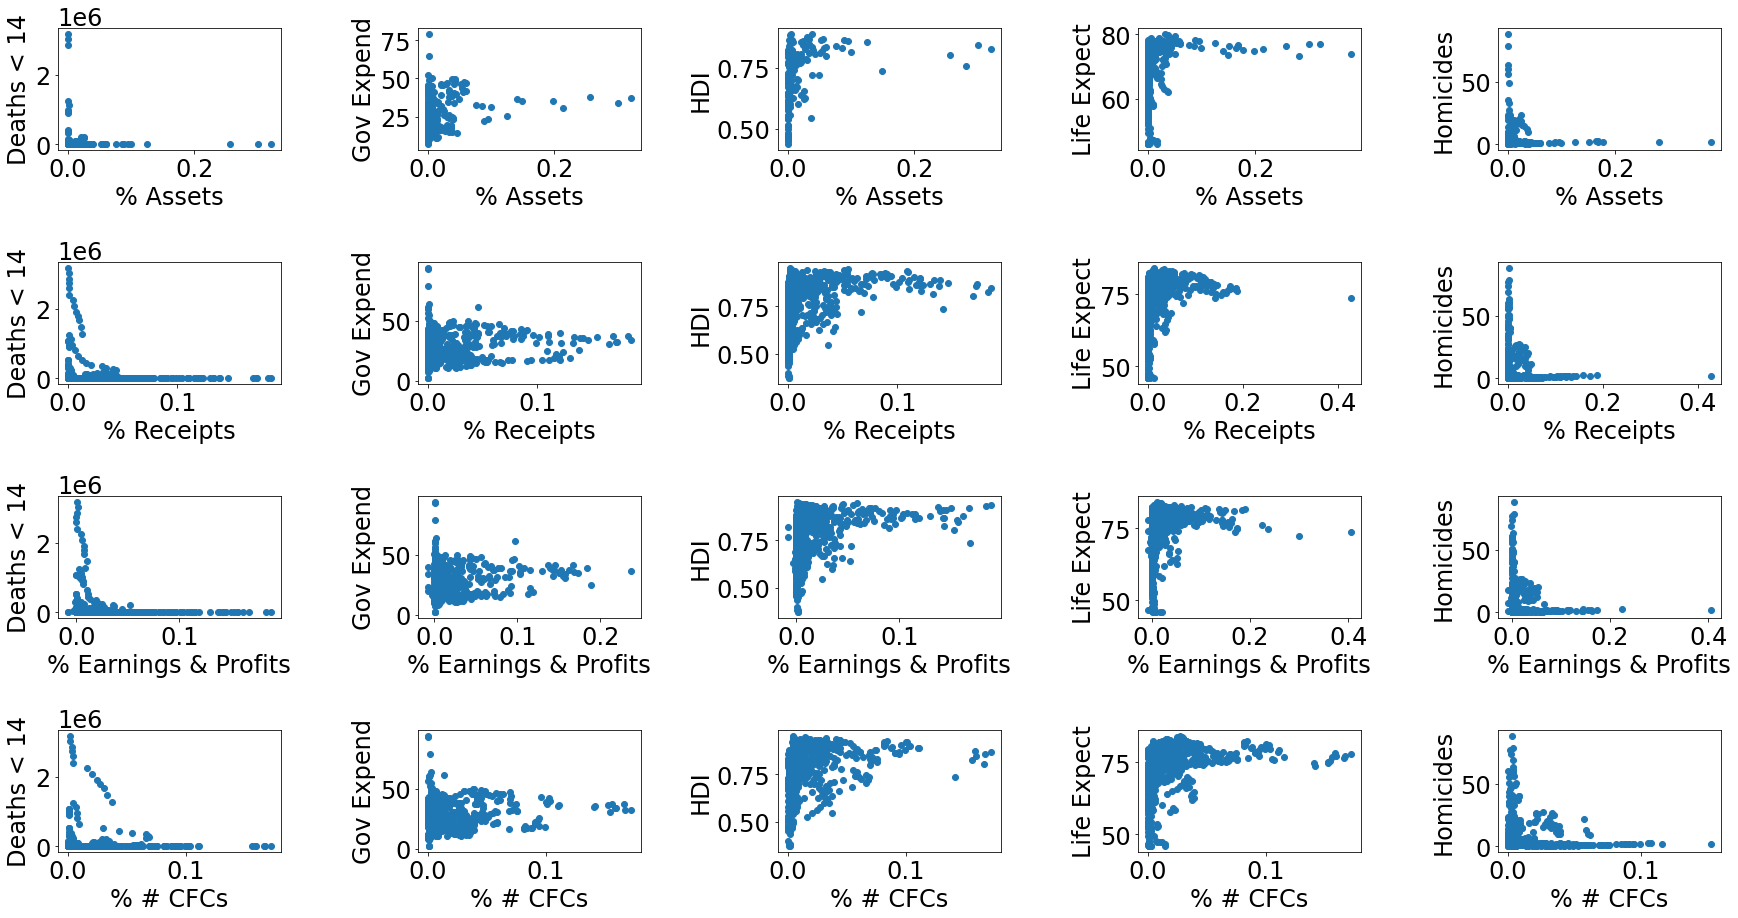

In [113]:
import matplotlib.pyplot as plt
x = 'IV_interaction'

fig, ax = plt.subplots(4,5, figsize = (13*2,14))
plt.rcParams.update({'font.size': 24})
fig.tight_layout(pad = 3)

cords = [(a,b) for a in range (0,5) for b in range (0,5)]
xlables = ['Deaths < 14', 'Gov Expend', 'HDI', 'Life Expect', 'Homicides']
ylables = ['% Assets', '% Receipts', '% Earnings & Profits', '% # CFCs']
counter = 0 
for x in ['x_p_total_assets', 'x_p_total_receipts', 'x_p_cur_EP', 'x_p_num_for_corps']:  
    for y in ['y_deaths_under_14', 'y_gov_expend', 'y_HDI', 'y_life_expectancy', 'y_homicides']:
 
        a, b = cords[counter]
        ax[a,b].scatter(full_panel[x], full_panel[y])
        ax[a,b].set_xlabel(ylables[a])
        ax[a,b].set_ylabel(xlables[b])
        full_panel_sans_nan = full_panel.dropna(axis = 0, how = 'any')


        counter += 1
        

# for i, row in enumerate(ax):
#     for j, cell in enumerate(row):
        
#         if i == len(ax) - 1:
#             cell.set_xlabel(xlables[j])
#         if j == 0:
            
#             cell.set_ylabel(ylables[i])



Text(0.5, 1.0, 'Correlations Between X, Y, and IV')

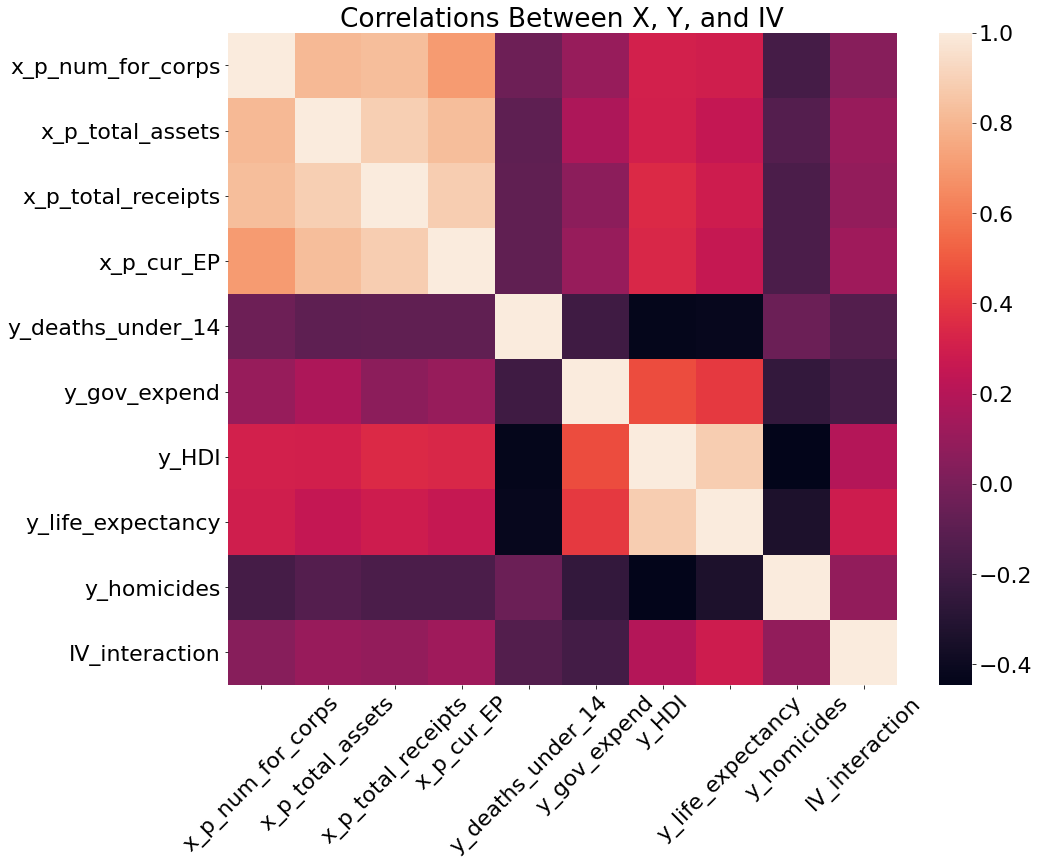

In [69]:
heat_map_cols = ['x_p_num_for_corps', 'x_p_total_assets', 'x_p_total_receipts',\
       'x_p_cur_EP', 'y_deaths_under_14', 'y_gov_expend', 'y_HDI', 'y_life_expectancy', 'y_homicides',\
       'IV_interaction']

        
heat_map_df = full_panel[heat_map_cols]
plt.figure(figsize=(15,12));
plt.rcParams.update({'font.size': 22})
sns.heatmap(heat_map_df.corr())
plt.xticks(rotation = 45)
plt.title("Correlations Between X, Y, and IV")



In [45]:
full_panel.columns

Index(['year', 'country_code', 'country_name', 'x_num_for_corps',
       'x_num_US_corps', 'x_total_assets', 'x_total_receipts', 'x_cur_EP',
       'x_p_num_for_corps', 'x_p_total_assets', 'x_p_total_receipts',
       'x_p_cur_EP', 'c_country_binary', 'c_region', 'c_sub_region', 'c_land',
       'c_resource_endowment', 'c_population', 'c_rGDP', 'y_deaths_under_14',
       'y_gov_expend', 'y_HDI', 'y_life_expectancy', 'y_homicides',
       'IV_interaction'],
      dtype='object')